Забегая вперёд, скажем пару слов о типизации столбцов. Для типизации в Postgres составляется запрос по модели column_name::column_type.

Таким образом, чтобы перевести city_id в текст, нам потребуется написать city_id::text.
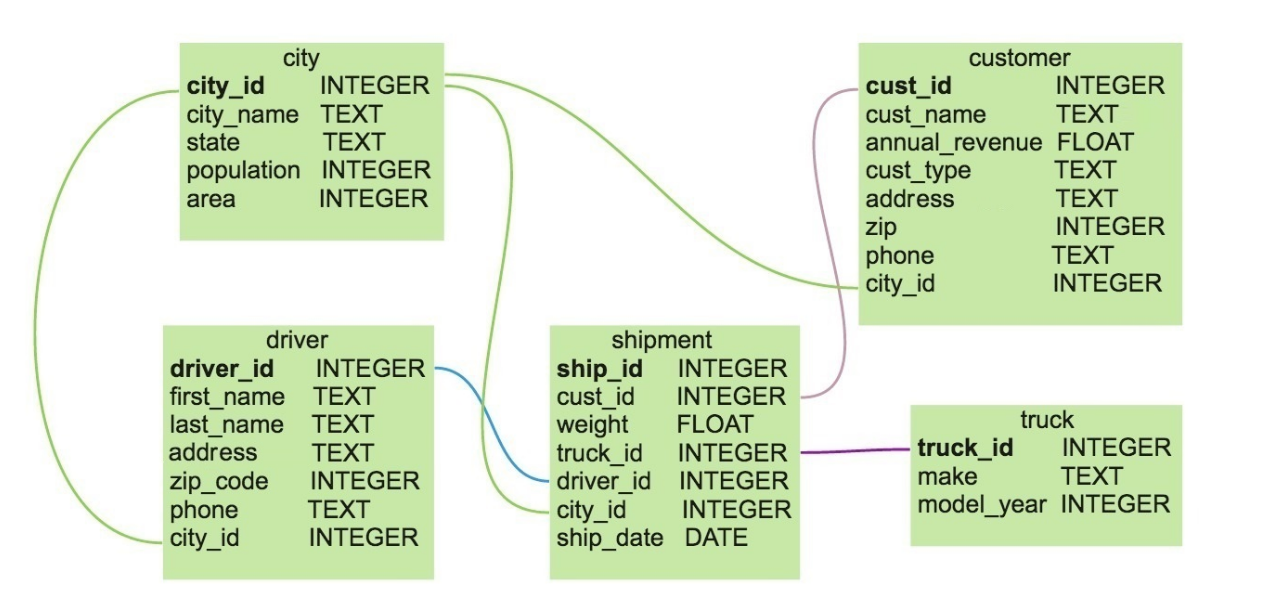

In [1]:
import pandas as pd
citi = pd.DataFrame({
    "НАЗВАНИЕ ПОЛЯ":['city_id','city_name','state','population','area'],
    "ТИП ДАННЫХ":['integer','text','text','integer','numeric'],
    'ОПИСАНИЕ':['уникальный идентификатор города, первичный ключ','название города','штат, к которому относится город','население города','площадь города']
})
display('citi')
display(citi)


'citi'

,НАЗВАНИЕ ПОЛЯ,ТИП ДАННЫХ,ОПИСАНИЕ
0,city_id,integer,"уникальный идентификатор города, первичный ключ"
1,city_name,text,название города
2,state,text,"штат, к которому относится город"
3,population,integer,население города
4,area,numeric,площадь города


In [2]:
customer = pd.DataFrame({
    "НАЗВАНИЕ ПОЛЯ":['city_id','cust_name','annual_revenue','cust_type','address','zip','phone','city_id'],
    "ТИП ДАННЫХ":['integer','text','numeric','text','text','integer','text','integer'],
    'ОПИСАНИЕ':['уникальный идентификатор клиента, первичный ключ','название клиента','ежегодная выручка','тип пользователя','адрес','почтовый индекс','телефон','идентификатор города, внешний ключ к таблице city']
})
display('customer')
display(customer)

'customer'

,НАЗВАНИЕ ПОЛЯ,ТИП ДАННЫХ,ОПИСАНИЕ
0,city_id,integer,"уникальный идентификатор клиента, первичный ключ"
1,cust_name,text,название клиента
2,annual_revenue,numeric,ежегодная выручка
3,cust_type,text,тип пользователя
4,address,text,адрес
5,zip,integer,почтовый индекс
6,phone,text,телефон
7,city_id,integer,"идентификатор города, внешний ключ к таблице city"


In [3]:
driver = pd.DataFrame({
    "НАЗВАНИЕ ПОЛЯ":['driver_id','first_name','last_name','address','zip_code','phone','city_id'],
    "ТИП ДАННЫХ":['integer','text','text','text','integer','text','integer'],
    'ОПИСАНИЕ':['уникальный идентификатор водителя, первичный ключ','имя водителя','фамилия водителя','адрес водителя','почтовый индекс водителя','телефон водителя','идентификатор города водителя, внешний ключ к таблице city'],
})
display('driver')
display(driver)


'driver'

,НАЗВАНИЕ ПОЛЯ,ТИП ДАННЫХ,ОПИСАНИЕ
0,driver_id,integer,"уникальный идентификатор водителя, первичный ключ"
1,first_name,text,имя водителя
2,last_name,text,фамилия водителя
3,address,text,адрес водителя
4,zip_code,integer,почтовый индекс водителя
5,phone,text,телефон водителя
6,city_id,integer,"идентификатор города водителя, внешний ключ к ..."


In [4]:
truck = pd.DataFrame({
    "НАЗВАНИЕ ПОЛЯ":['truck_id','make','model_year'],
    "ТИП ДАННЫХ":['integer','text','integer'],
    'ОПИСАНИЕ':['Уникальный идентификатор грузовика, первичный ключ','Производитель грузовика','Дата выпуска грузовика']
})
display('truck')
display(truck)

'truck'

,НАЗВАНИЕ ПОЛЯ,ТИП ДАННЫХ,ОПИСАНИЕ
0,truck_id,integer,"Уникальный идентификатор грузовика, первичный ..."
1,make,text,Производитель грузовика
2,model_year,integer,Дата выпуска грузовика


In [5]:
shipment = pd.DataFrame({
    "НАЗВАНИЕ ПОЛЯ":['ship_id','cust_id','weight','truck_id','driver_id','city_id','ship_date'],
    "ТИП ДАННЫХ":['integer','integer','numeric','integer','integer','integer','date'],
    'ОПИСАНИЕ':['уникальный идентификатор доставки, первичный ключ', 'идентификатор клиента, которому отправлена доставка, внешний ключ к таблице customer', 'вес посылки', 'идентификатор грузовика, на котором отправлена доставка, внешний ключ к таблице truck', 'идентификатор водителя, который осуществлял доставку, внешний ключ к таблице driver', 'идентификатор города в который совершена доставка, внешний ключ к таблице city' ,'дата доставки'
],
})
display('shipment')
display(shipment)

'shipment'

,НАЗВАНИЕ ПОЛЯ,ТИП ДАННЫХ,ОПИСАНИЕ
0,ship_id,integer,"уникальный идентификатор доставки, первичный ключ"
1,cust_id,integer,"идентификатор клиента, которому отправлена дос..."
2,weight,numeric,вес посылки
3,truck_id,integer,"идентификатор грузовика, на котором отправлена..."
4,driver_id,integer,"идентификатор водителя, который осуществлял до..."
5,city_id,integer,идентификатор города в который совершена доста...
6,ship_date,date,дата доставки


Вместо результата вы получите сообщение об ошибке: "ERROR: UNION types integer and text cannot be matched". Дело в том, что мы попытались объединить числовой и строковый типы в одной колонке, а это невозможно.

Если мы всё же хотим выполнить поставленную задачу, придётся привести оба столбца к одному типу данных. Не каждый текст может быть приведён к числу, зато каждое число может быть представлено в текстовом формате.

Забегая вперёд, скажем пару слов о типизации столбцов. Для типизации в Postgres составляется запрос по модели **column_name::column_type.**

Таким образом, чтобы перевести city_id в текст, нам потребуется написать **city_id::text.**

Важно! Любой тип данных может быть приведён к текстовому формату — эту возможность целесообразно использовать для соединения разнородных сущностей. Главное — помнить, что сортировка текста отличается от сортировки чисел и дат.

In [ ]:
#/*Напишите запрос, который объединит в себе все почтовые индексы водителей и их телефоны в единый столбец-справочник contact. 
#Также добавьте столбец с именем водителя first_name и столбец contact_type с типом контакта (phone или zip в зависимости от типа). 
#Отсортируйте список по столбцу с контактными данными в порядке возрастания, а затем — по имени водителя.*/
"""
SELECT phone contact , first_name ,'phone' contact_type
FROM sql.driver  
UNION all
SELECT zip_code::text, first_name,'zip'
FROM sql.driver 
order by 1,2
"""

In [ ]:
"""
SELECT
         c.city_name,
         c.population /*выбираем столбцы city_name, population*/
FROM
         sql.city c /*из схемы sql и таблицы city, задаём таблице алиас с*/

UNION ALL /*оператор присоединения*/

SELECT
         'total',
         SUM(c.population) /*сами задаём объект ‘total’, суммируем все значения столбца population*/
FROM
         sql.city c /*из схемы sql и таблицы city, задаём таблице алиас с*/
ORDER BY 2 DESC /*сортируем по второму столбцу в убывающем порядке (чтобы итоговая сумма была в начале)*/"""

In [ ]:
#/*Напишите запрос, который выводит общее число доставок total_shipments, 
#а также количество доставок в каждый день. Необходимые столбцы: date_period, cnt_shipment. 
#Не забывайте о единой типизации. Упорядочите по убыванию столбца date_period.*/
"""
SELECT
          ship_date::text as date_period,
         count(ship_date) as cnt_shipment
FROM
         sql.shipment 
group by ship_date

UNION ALL

SELECT
         'total_shipments',
         count(*)
FROM
         sql.shipment
ORDER BY 2 DESC
"""

In [ ]:
#/*Напишите запрос, который выведет все города и штаты, в которых они расположены, а также информацию о том, была ли осуществлена доставка в этот город:
#
#если в город была осуществлена доставка, то выводим 'доставка осуществлялась';
#если нет — выводим 'доставка не осуществлялась'.
#Столбцы к выводу: city_name, state, shipping_status. Отсортируйте в алфавитном порядке по городу, а затем — по штату.*/
"""
SELECT
         c.city_name,
         c.state,
         'доставка осуществлялась' shipping_status
FROM
         sql.city c
         left join sql.shipment s on c.city_id = s.city_id
WHERE s.city_id is not null

UNION

SELECT
         c.city_name,
         c.state,
         'доставка не осуществлялась' shipping_status
FROM
         sql.city c
         left join sql.shipment s on c.city_id = s.city_id
WHERE s.city_id is  null
order by 1,2
"""

In [ ]:
#/*Напишите запрос, который выводит два столбца: city_name и shippings_fake. Выведите города, куда совершались доставки. Пусть первый столбец содержит название города, а второй формируется так:
#
#если в городе было более десяти доставок, вывести количество доставок в этот город как есть;
#иначе — вывести количество доставок, увеличенное на пять.
#Отсортируйте по убыванию получившегося «нечестного» количества доставок, а затем — по имени в алфавитном порядке..*/
"""
SELECT
    c.city_name,
    count(c.city_name) as shippings_fake
FROM
    sql.shipment s
    left join sql.city c on c.city_id = s.city_id
group by c.city_name
having count(c.city_name) > 10

UNION

SELECT
    c.city_name,
    count(c.city_name) + 5 as shippings_fake
FROM
    sql.shipment s
    left join sql.city c on c.city_id = s.city_id
group by c.city_name
having count(c.city_name) < 11
order by 2 desc , 1"""

In [ ]:
#/*Давайте подготовим географическую сводку для каждого города. Напишите SQL-запрос, который выведет описание региона в следующем формате:
#[city_name] is located in [state]. There's [population] people living there. Its area is [area]
#Обратите внимание, точку в конце ставить не нужно. Отсортируйте по названию города в алфавитном порядке. Столбец к выдаче — str (сводка). Пример:
#Abilene is located in Texas. There's 115930 people living there. Its area is 105.10*/
"""
select format($$%s is located in %s. There's %s people living there. Its area is %s$$, city_name, state, population, area)
from shipping.city c
"""